读取被试数据，选择频带，沿频带方向取平均值--> (samples, 62)

In [7]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

person = '15_20131105'
band = 'gamma'

t0_degree, t1_degree, t2_degree, all_degree = [], [], [], []

for cnt in range(1123):
    for label in range(3):
        try:
            adj_matrix = np.load(f'/data/Anaiis/garage/adj_matrix/{person}-{band}-adj_matrix{cnt}-{label}.npy')
        except:
            continue
        degree = adj_matrix.mean(axis=1)
        all_degree.append(degree[:])
        t0_degree.append(degree[:62])
        t1_degree.append(degree[62:124])
        t2_degree.append(degree[124:186])

# 转换为 numpy 数组
data_t0 = np.array(t0_degree)
data_t1 = np.array(t1_degree)
data_t2 = np.array(t2_degree)
data_all = np.array(all_degree)

data_combined = np.vstack([data_t0, data_t1, data_t2])


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

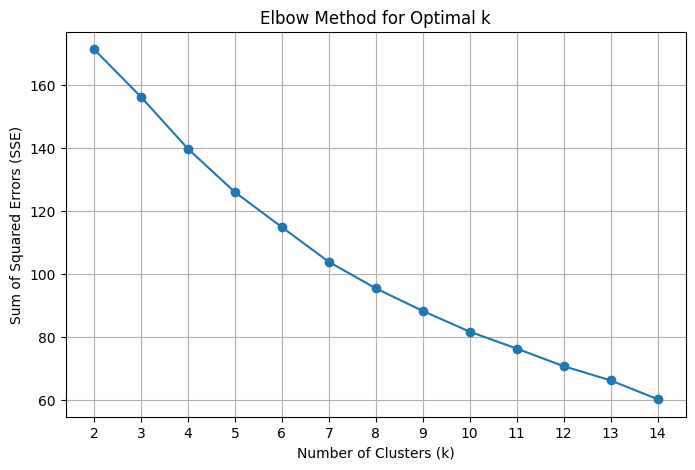

In [8]:
sse = []
k_range = range(2, 15) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=929)
    kmeans.fit(data_all)
    sse.append(kmeans.inertia_)  # 计算每个 k 的 SSE

# 绘制肘部图
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [9]:
n_clusters = 4  # 可以根据需要调整

# 创建一个 KMeans 聚类器并进行聚类
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_all)
centers = kmeans.cluster_centers_


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

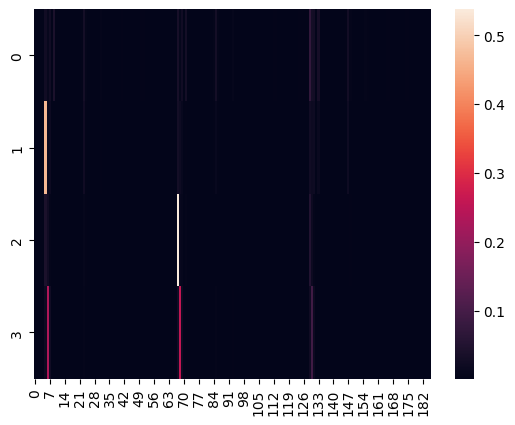

In [10]:
import seaborn as sns
sns.heatmap(centers)

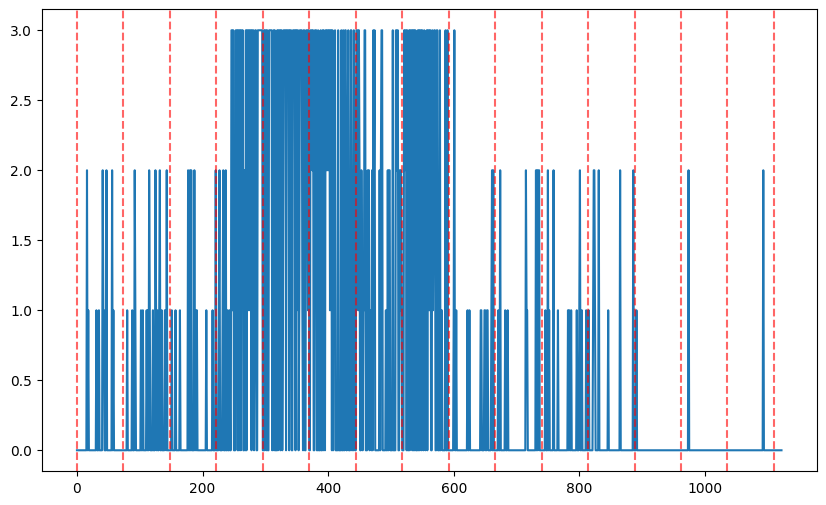

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cluster_labels)
for x in range(0, len(cluster_labels), 74):
    ax.axvline(x=x, color='red', linestyle='--', alpha=0.6)

# [1, 0, -1, -1, 0, 1, -1, 0, 1, 1, 0, -1, 0, 1, -1]